# 1 Random Forests

imports

In [1]:
import numpy as np;
from skimage import io
from scipy.ndimage import gaussian_filter, gaussian_laplace, gaussian_gradient_magnitude
import matplotlib.pyplot as plt;
from copy import deepcopy
from skimage.feature import structure_tensor, hessian_matrix, hessian_matrix_eigvals

## 1.1  Download and load the data

In [2]:
#import labels
labels = np.load('ex01_train_labels.npy')[:,:,0];
#import pictures
test_png = io.imread('ex01_test.png', as_grey=True);
train_png = io.imread('ex01_train.png', as_grey=True);
labeled_train_png = deepcopy(train_png);
labeled_train_png[~np.isnan(labels)]=labels[~np.isnan(labels)];
#plot side by side
plt.figure(1);
plt.subplot(121);
plt.title('train image');
plt.imshow(train_png);
plt.subplot(122);
plt.title('labeled train image');
plt.imshow(labeled_train_png);
plt.show();

## 1.2 Features

In [3]:
sigma  = np.array([0.7,1,1.6,3.5,5,10])

### Gaussian Filter
on train image

In [4]:
plt.figure(2);
fig, axs = plt.subplots(2,3, figsize=(15, 10));
fig.subplots_adjust(hspace = 0.5, wspace=0.5);
axs = axs.ravel()
for i in range(len(sigma)):
    axs[i].contourf(gaussian_filter(labeled_train_png,sigma[i]))
    axs[i].set_title(r'$\sigma$ =%s'%(sigma[i]))
plt.show();

on test image

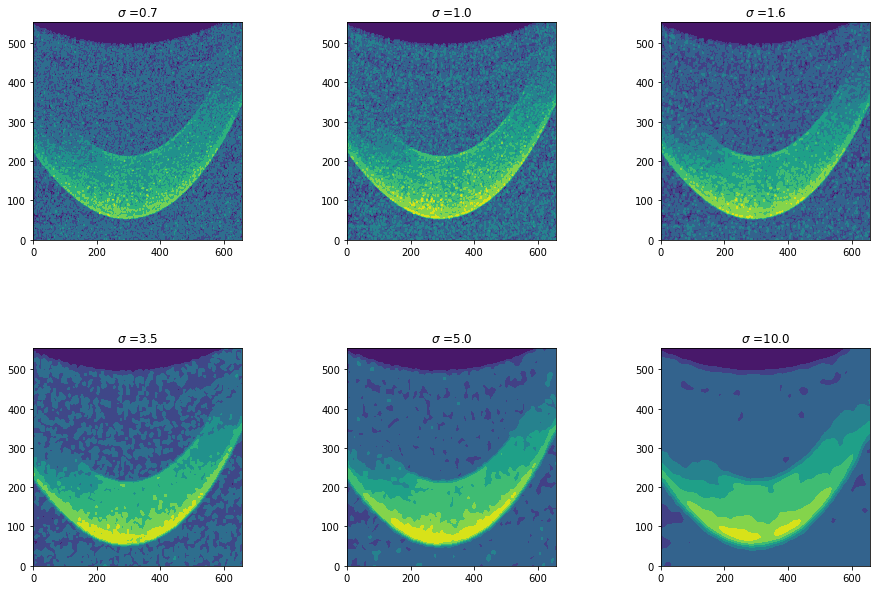

In [5]:
plt.figure(3);
fig, axs = plt.subplots(2,3, figsize=(15, 10));
fig.subplots_adjust(hspace = 0.5, wspace=0.5);
axs = axs.ravel()
for i in range(len(sigma)):
    axs[i].contourf(gaussian_filter(test_png,sigma[i]))
    axs[i].set_title(r'$\sigma$ =%s'%(sigma[i]))
plt.show();

###  Gaussian-Laplace Filter
on train image

In [6]:
plt.figure(4);
fig, axs = plt.subplots(2,3, figsize=(15, 10));
fig.subplots_adjust(hspace = 0.5, wspace=0.5);
axs = axs.ravel()
for i in range(len(sigma)):
    axs[i].contourf(gaussian_laplace(train_png,sigma[i]))
    axs[i].set_title(r'$\sigma$ =%s'%(sigma[i]))
plt.show();

on test image

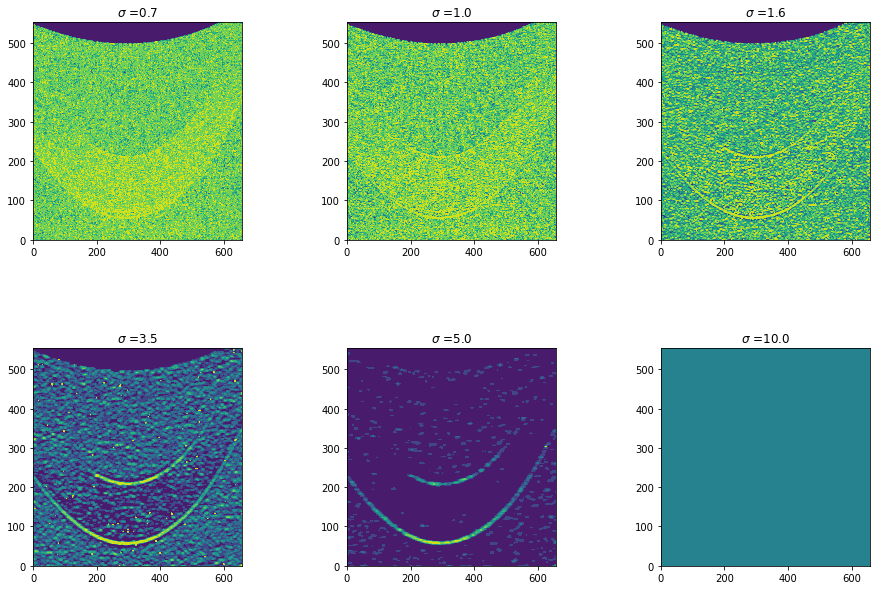

In [7]:
plt.figure(5);
fig, axs = plt.subplots(2,3, figsize=(15, 10));
fig.subplots_adjust(hspace = 0.5, wspace=0.5);
axs = axs.ravel()
for i in range(len(sigma)):
    axs[i].contourf(gaussian_laplace(test_png,sigma[i]))
    axs[i].set_title(r'$\sigma$ =%s'%(sigma[i]))
plt.show();

### Gaussian Gradient Magnitude filter
on train image

In [8]:
plt.figure(6);
fig, axs = plt.subplots(2,3, figsize=(15, 10));
fig.subplots_adjust(hspace = 0.5, wspace=0.5);
axs = axs.ravel()
for i in range(len(sigma)):
    axs[i].contourf(gaussian_gradient_magnitude(train_png,sigma[i]))
    axs[i].set_title(r'$\sigma$ =%s'%(sigma[i]))
plt.show();

on test image

In [9]:
plt.figure(7);
fig, axs = plt.subplots(2,3, figsize=(15, 10));
fig.subplots_adjust(hspace = 0.5, wspace=0.5);
axs = axs.ravel()
for i in range(len(sigma)):
    axs[i].contourf(gaussian_gradient_magnitude(test_png,sigma[i]))
    axs[i].set_title(r'$\sigma$ =%s'%(sigma[i]))
plt.show();

### structure tensor
#### on train image

In [10]:
plt.figure(8);
fig, axs = plt.subplots(2,3, figsize=(15, 10));
fig.subplots_adjust(hspace = 0.5, wspace=0.5);
axs = axs.ravel()
for i in range(len(sigma)):
    axs[i].contourf(structure_tensor(train_png,sigma[i])[0])
    axs[i].set_title(r'$\sigma$ =%s'%(sigma[i]))
plt.show();

### on test image

In [11]:
plt.figure(9);
fig, axs = plt.subplots(2,3, figsize=(15, 10));
fig.subplots_adjust(hspace = 0.5, wspace=0.5);
axs = axs.ravel()
for i in range(len(sigma)):
    axs[i].contourf(structure_tensor(test_png,sigma[i])[0])
    axs[i].set_title(r'$\sigma$ =%s'%(sigma[i]))
plt.show();

### hessian eigenvalues
#### on train image

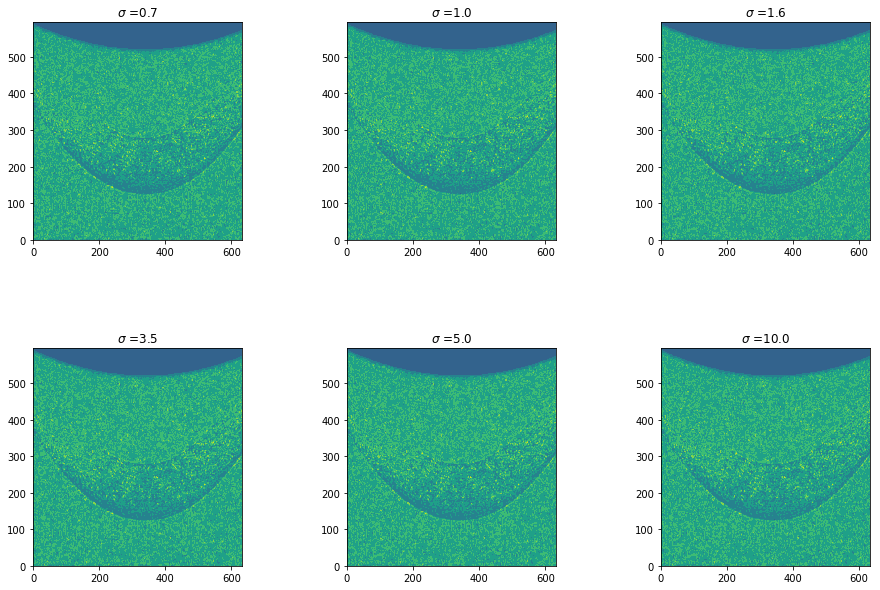

In [12]:
plt.figure(10);
fig, axs = plt.subplots(2,3, figsize=(15, 10));
fig.subplots_adjust(hspace = 0.5, wspace=0.5);
axs = axs.ravel()
for i in range(len(sigma)):
    x,y,z = hessian_matrix(train_png, sigma=0.5, order='rc')
    axs[i].contourf(hessian_matrix_eigvals(x,y,z)[0])
    axs[i].set_title(r'$\sigma$ =%s'%(sigma[i]))
plt.show();

### on test image

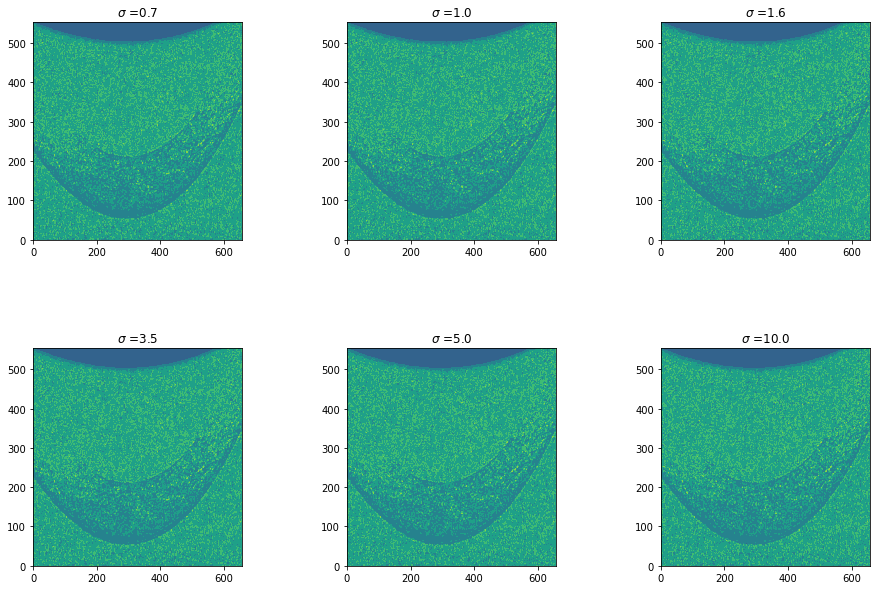

In [13]:
plt.figure(11);
fig, axs = plt.subplots(2,3, figsize=(15, 10));
fig.subplots_adjust(hspace = 0.5, wspace=0.5);
axs = axs.ravel()
for i in range(len(sigma)):
    x,y,z = hessian_matrix(test_png, sigma=0.5, order='rc')
    axs[i].contourf(hessian_matrix_eigvals(x,y,z)[0])
    axs[i].set_title(r'$\sigma$ =%s'%(sigma[i]))
plt.show();